# import packages and read data

In [1]:
import scipy.io as scio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = scio.loadmat('spamData.mat')
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Aug 16 16:33:53 2021', '__version__': '1.0', '__globals__': [], 'Xtrain': array([[  0.   ,   0.   ,   0.   , ...,   4.5  ,  34.   , 108.   ],
       [  0.   ,   0.   ,   0.71 , ...,   1.974,  34.   , 229.   ],
       [  0.   ,   0.   ,   0.   , ...,   1.   ,   1.   ,   5.   ],
       ...,
       [  0.   ,   0.   ,   0.   , ...,   1.884,   9.   ,  98.   ],
       [  0.   ,   0.   ,   0.7  , ...,   1.333,   4.   ,  16.   ],
       [  0.   ,   0.   ,   0.   , ...,   1.   ,   1.   ,   4.   ]]), 'Xtest': array([[1.500e-01, 0.000e+00, 6.300e-01, ..., 1.111e+00, 7.000e+00,
        3.890e+02],
       [0.000e+00, 0.000e+00, 7.000e-01, ..., 1.820e+00, 1.800e+01,
        3.040e+02],
       [5.800e-01, 0.000e+00, 1.900e-01, ..., 3.015e+00, 2.100e+01,
        1.900e+02],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.142e+00, 3.000e+00,
        4.000e+01],
       [0.000e+00, 0.000e+00, 3.100e-01, ..., 1.515e+00, 1

In [3]:
X_train = pd.DataFrame(data['Xtrain'])
X_test = pd.DataFrame(data['Xtest'])
y_train = pd.DataFrame(data['ytrain'])
y_test = pd.DataFrame(data['ytest'])

# Data Processing:
## Use log-transform: transform each feature using log(Xij + 0.1) (assume natural log)

In [4]:
X_train_log = np.log(X_train + 0.1)
X_test_log = np.log(X_test + 0.1)

## For the log-transformed data, implement a KNN classifier. Use the Euclidean distance to measure distance between neighbors. For each value of K = {1, 2, · · · , 9, 10, 15, 20, · · · , 95, 100} , compute the training and test error rates

In [7]:
class  K_Nearest_Neighbors_Classifier():

    '''
        X_train(pd.DataFrame) : features of train data
        y_train(pd.DataFrame) : label of train data
        X_test(pd.DataFrame) : features of test data
        y_test(pd.DataFrame) : label of test data
        K(int):the hyperparameter K of KNN
    '''   
    def __init__(self, X_train, y_train, X_test, y_test, K): 
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.K = K
    
    '''
        X1(np.ndarray) : Vertor X1,size = N * D
        X2(np.ndarray) : Vertor X2,size = 1 * D
    '''
    #calculate the euclidean distance between X1 and X2
    def euclidean_distance(self, X1, X2):
        return np.sqrt(np.sum((X1 - X2)**2,axis=1))
    
    '''      
        X_to_predict(pd.DataFrame) : Data to predict
    '''
    #Calculate distance from each row of train data and each row of test data, record the label of train data
    #And predict label of input
    def caculate_distance_and_predict(self, X_to_predict):
        '''
        Calculate distance from each row of train data and each row of test data, record the label of train data
        '''
        predict = []
        d_idx_y = self.y_train.copy()
        d_idx_y.columns = pd.Series(['y_val'])

        for row in range(0, X_to_predict.shape[0]):
            dis = []
            dis = self.euclidean_distance(self.X_train.values, X_to_predict.iloc[row].values)
            d_idx_y['distance'] = dis
            d_sort = d_idx_y.sort_values(by='distance',ascending=True)
            result = d_sort.head(self.K)[['y_val']].sum()[0]
            predict.append(1 if 2*result > self.K else 0)
        
        return predict
    
    
    '''      
        pred(list) : Predict label of data
        true(np.ndarray) : True label of data
    '''
    #calculate the error rate(%) of the predict label and true label
    def calculate_error(self, pred, true):
        return (pred^true).sum() / len(pred) * 100
    
    #return the train error rate and test error rate
    def run(self):
        
        # get predictions
        train_predict = self.caculate_distance_and_predict(self.X_train)
        test_predict = self.caculate_distance_and_predict(self.X_test)
        # score and return results
        return self.calculate_error(train_predict, self.y_train[0].values), \
               self.calculate_error(test_predict, self.y_test[0].values)

## Q4(a)
## For each value of K = {1, 2, · · · , 9, 10, 15, 20, · · · , 95, 100}

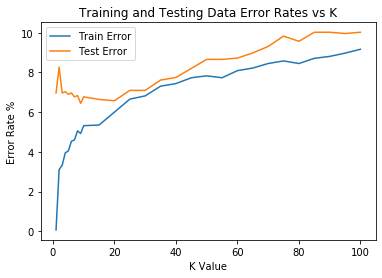

In [8]:
# initialise empty list for storage
Ks = list(np.arange(1, 10, 1))
Ks.extend(list(np.arange(10, 105, 5)))

train_error_list = []
test_error_list = []

# loop over lamda values
for K in Ks:
    knn = K_Nearest_Neighbors_Classifier(X_train_log, y_train, X_test_log, y_test, K)
    train_error, test_error = knn.run()
    train_error_list.append(train_error)
    test_error_list.append(test_error)
    
# plot chart
plt.plot(Ks, train_error_list, label='Train Error')
plt.plot(Ks, test_error_list, label='Test Error')
plt.ylabel('Error Rate %')
plt.xlabel('K Value')
plt.title('Training and Testing Data Error Rates vs K')
plt.legend()
plt.show()

## Q4(b)
## What do you observe about the training and test errors as K change?
For train error: it increase as K increases. And the best K is when K=1, the error rate is 0.065%.It's easier to think about, because at K=1, its nearest neighbor is itself<br>
For train error: In general,it increase as K increases. And the best K is about K=8, the error rate is about 6.2%. We can assume that when K is very small, test data nearest neighbor may contain more outliers that are not in his label.When K is very large, the distance between his neighbors and him will become larger, and their similarity will decrease. <br>
Train error is always less than test error.When K<35, the gap between train error and test error decreases as K increases.  When 35<K<50,the gap increases as K increases.When K>50, the gap becomes stable.

## Q4(c)
## Training and testing error rates for K = 1, 10 and 100.

In [9]:
for K in [1, 10, 100]:
    index = Ks.index(K)
    print('When K = %d :train error rate is %f%% , test error rate is %f%%' %(K, train_error_list[index], test_error_list[index]))

When K = 1 :train error rate is 0.065253% , test error rate is 6.966146%
When K = 10 :train error rate is 5.318108% , test error rate is 6.770833%
When K = 100 :train error rate is 9.168026% , test error rate is 10.026042%
